# eICU Collaborative Research Database

# Notebook 1: Exploring the `patient` table

The aim of this Notebook is to introduce the `patient` table, a key table in the eICU Collaborative Research Database. 

The `patient` table contains patient demographics and admission and discharge details for hospital and ICU stays. For more detail, see: http://eicu-crd.mit.edu/eicutables/patient/

Before starting, you will need to copy the eicu demo database file ('eicu_demo.sqlite3') to the `data` directory.

Documentation on the eICU Collaborative Research Database can be found at: http://eicu-crd.mit.edu/. 

## 1. Getting set up

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os

In [2]:
# Plot settings
%matplotlib inline
plt.style.use('ggplot')
fontsize = 20 # size for x and y ticks
plt.rcParams['legend.fontsize'] = fontsize
plt.rcParams.update({'font.size': fontsize})

In [3]:
# Connect to the database
fn = os.path.join('data','eicu_demo.sqlite3')
con = sqlite3.connect(fn)
cur = con.cursor()

## 2. Display list of tables

In [4]:
query = \
"""
SELECT type, name
FROM sqlite_master 
WHERE type='table'
ORDER BY name;
"""

list_of_tables = pd.read_sql_query(query,con)

In [5]:
list_of_tables

,type,name
0,table,admissiondrug
1,table,admissiondx
2,table,apacheapsvar
3,table,apachepatientresult
4,table,apachepredvar
5,table,careplancareprovider
6,table,careplaneol
7,table,careplangeneral
8,table,careplangoal
9,table,careplaninfectiousdisease


## 3. Reviewing the patient table

In [6]:
# query to load data from the patient table
query = \
"""
SELECT *
FROM patient
"""

print(query)


SELECT *
FROM patient



In [7]:
# run the query and assign the output to a variable
patient_tab = pd.read_sql_query(query,con)

In [8]:
# display the first few rows of the dataframe
patient_tab.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmityear,...,unitstaytype,admissionweight,dischargeweight,unitdischargeyear,unitdischargetime24,unitdischargetime,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,165840,148008,Male,81,Caucasian,61,120,"Arrest, respiratory (without cardiac arrest)",167.0,2015,...,admit,92.4,92.4,2015,23:48:00,midnight,75,Step-Down Unit (SDU),Alive,002-12363
1,165841,148008,Male,81,Caucasian,61,120,,167.0,2015,...,stepdown/other,NaN,NaN,2015,03:15:00,morning,207,Death,Expired,002-12363
2,193119,169237,Male,84,Caucasian,69,98,"Rhythm disturbance (atrial, supraventricular)",157.5,2015,...,admit,54.3,54.3,2015,02:23:00,morning,2176,Step-Down Unit (SDU),Alive,002-13750
3,193120,169237,Male,84,Caucasian,69,98,,157.5,2015,...,stepdown/other,NaN,NaN,2015,03:42:00,morning,79,Floor,Alive,002-13750
4,147894,134127,Male,79,Caucasian,60,83,,160.0,2015,...,admit,NaN,88.1,2015,00:10:00,midnight,4,Step-Down Unit (SDU),Alive,002-14007


In [9]:
# list all of the columns in the table
patient_tab.columns

Index([u'patientunitstayid', u'patienthealthsystemstayid', u'gender', u'age',
       u'ethnicity', u'hospitalid', u'wardid', u'apacheadmissiondx',
       u'admissionheight', u'hospitaladmityear', u'hospitaladmittime24',
       u'hospitaladmittime', u'hospitaladmitoffset', u'hospitaladmitsource',
       u'hospitaldischargeyear', u'hospitaldischargetime24',
       u'hospitaldischargetime', u'hospitaldischargeoffset',
       u'hospitaldischargelocation', u'hospitaldischargestatus', u'unittype',
       u'unitadmityear', u'unitadmittime24', u'unitadmittime',
       u'unitadmitsource', u'unitvisitnumber', u'unitstaytype',
       u'admissionweight', u'dischargeweight', u'unitdischargeyear',
       u'unitdischargetime24', u'unitdischargetime', u'unitdischargeoffset',
       u'unitdischargelocation', u'unitdischargestatus', u'uniquepid'],
      dtype='object')

### Questions

- What does `patientunitstayid` represent? (hint, see: http://eicu-crd.mit.edu/eicutables/patient/)
- What does `patienthealthsystemstayid` represent?
- What does `uniquepid` represent?

In [20]:
# select a limited number of columns to view
columns = ['uniquepid', 'patientunitstayid','gender','age','unitdischargestatus']
patient_tab[columns].head()

,uniquepid,patientunitstayid,gender,age,unitdischargestatus
0,002-12363,165840.0,Male,81,Alive
1,002-12363,165841.0,Male,81,Expired
2,002-13750,193119.0,Male,84,Alive
3,002-13750,193120.0,Male,84,Alive
4,002-14007,147894.0,Male,79,Alive


In [11]:
# what are the unique values for age?
age_col = 'age'
patient_tab[age_col].sort_values().unique()

array([u'14', u'18', u'19', u'21', u'22', u'24', u'26', u'27', u'28',
       u'30', u'31', u'32', u'33', u'34', u'35', u'36', u'37', u'38',
       u'39', u'40', u'41', u'42', u'43', u'44', u'45', u'46', u'47',
       u'48', u'49', u'50', u'51', u'52', u'53', u'54', u'55', u'56',
       u'57', u'58', u'59', u'60', u'61', u'62', u'63', u'64', u'65',
       u'66', u'67', u'68', u'69', u'70', u'71', u'72', u'73', u'74',
       u'75', u'76', u'77', u'78', u'79', u'80', u'81', u'82', u'83',
       u'84', u'85', u'86', u'87', u'88', u'89', u'> 89'], dtype=object)

### Questions

- Try plotting a histogram of ages using the commands in the cell below. Why does the plot fail?

```python
# try plotting a histogram of ages
figsize = (18,8)
patient_tab[age_col].plot(kind='hist',
                          figsize=figsize, 
                          fontsize=fontsize,
                          bins=15)
```

In [12]:
# create a column containing numerical ages
# If ‘coerce’, then invalid parsing will be set as NaN
agenum_col = 'age_num'
patient_tab[agenum_col] = pd.to_numeric(patient_tab[age_col], errors='coerce')
patient_tab[agenum_col].sort_values().unique()

array([ 14.,  18.,  19.,  21.,  22.,  24.,  26.,  27.,  28.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  nan])

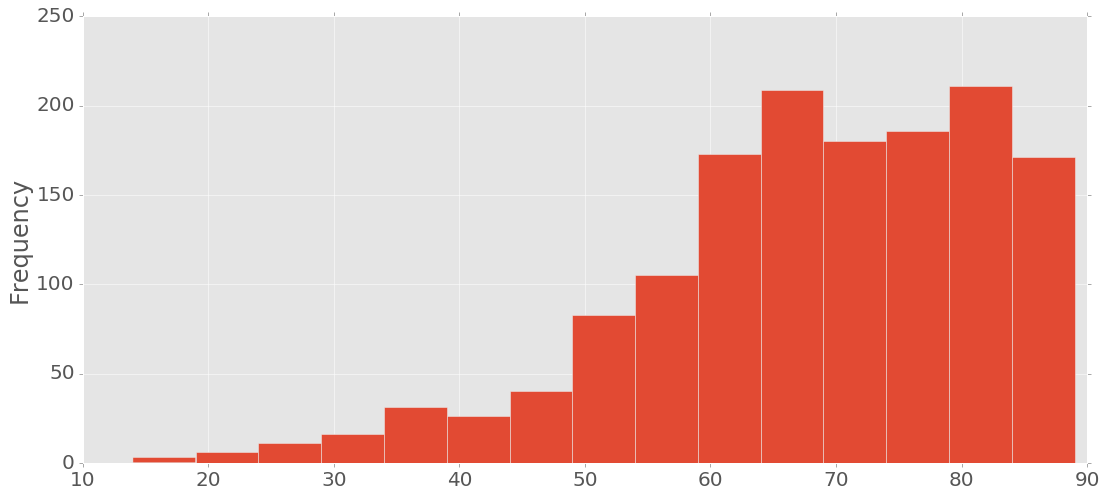

In [13]:
# try plotting a histogram of ages
figsize = (18,8)
patient_tab[agenum_col].plot(kind='hist',
                             figsize=figsize, 
                             fontsize=fontsize,
                             bins=15)

### Questions

- Use the `mean()` method to find the mean age (hint: `patient_tab[agenum_col].mean()`). What is the mean? Why might we expect this to be lower than the true mean?
- In the same way that you use `.mean()`, you can use `.describe()`. Use the `describe()` method to explore the `admissionweight` of patients in kg. What issue do you see? What are some methods that you could use to deal with this issue?

In [14]:
# set threshold based on 99th quantile
adweight_col = 'admissionweight'
quant = patient_tab[adweight_col].quantile(0.99)
patient_tab[patient_tab[adweight_col] > quant] = None

In [15]:
# describe the admission weights
patient_tab[adweight_col].describe()

count    1404.000000
mean       80.839544
std        25.404768
min         0.000000
25%        63.000000
50%        77.100000
75%        93.000000
max       187.000000
Name: admissionweight, dtype: float64

### Questions

- What is the average change in weight between `admissionweight` and `dischargeweight`?
- Plot a distribution of the weight change

In [16]:
# set threshold based on 99th quantile
disweight_col = 'dischargeweight'
quant = patient_tab[disweight_col].quantile(0.99)
patient_tab[patient_tab[disweight_col] > quant] = None

In [17]:
# describe the discharge weights
patient_tab[disweight_col].describe()

count    842.000000
mean      82.659834
std       24.535297
min        1.000000
25%       65.725000
50%       78.675000
75%       97.075000
max      154.900000
Name: dischargeweight, dtype: float64

In [18]:
patient_tab['weight_change'] = patient_tab[adweight_col] - patient_tab[disweight_col]

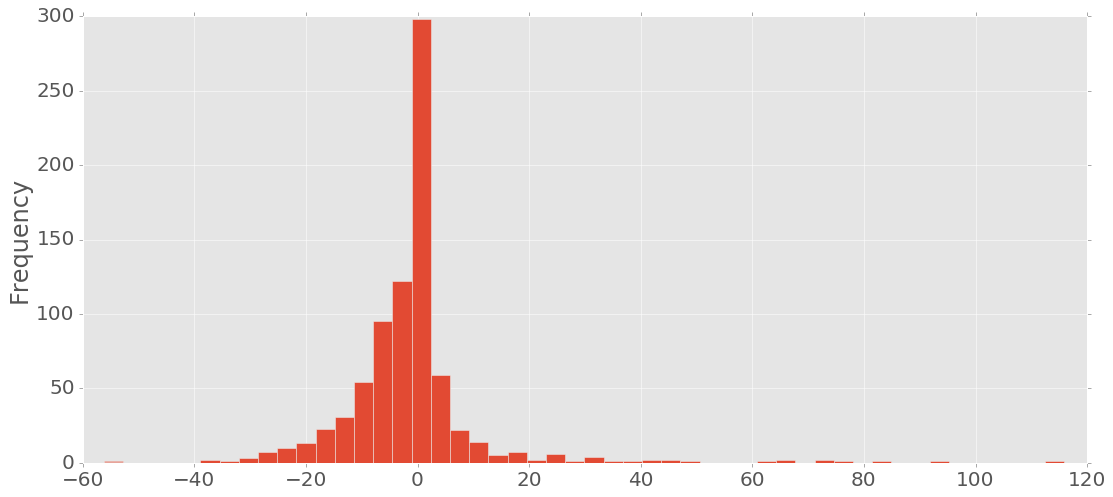

In [19]:
# plot the weight changes
figsize = (18,8)
patient_tab['weight_change'].plot(kind='hist',
                             figsize=figsize, 
                             fontsize=fontsize,
                             bins=50)